In [4]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

Using TensorFlow backend.


ModuleNotFoundError: No module named 'plotly'

In [5]:
conda install -c plotly plotly

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

## Package Plan ##

  environment location: C:\Users\pasm9\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    plotly-4.7.1               |             py_0         4.7 MB  plotly
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         7.6 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.7.1-py_0
  retrying           pkgs/main/win-64::retrying-1.3.3-py37_2

The following packages will be UPDATED:

  conda                        anaconda::conda-4.

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


In [6]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

ModuleNotFoundError: No module named 'fbprophet'

In [7]:
conda install -c conda-forge fbprophet

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

## Package Plan ##

  environment location: C:\Users\pasm9\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    convertdate-2.2.1          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.1            |             py_0          56 KB  conda-forge
    libpython-2.0              |           py37_0          47 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |      

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


In [8]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [9]:
DATASET_DIR = "covid-19-x-ray-10000-images/dataset"

In [10]:
os.listdir(DATASET_DIR)

['covid', 'normal']

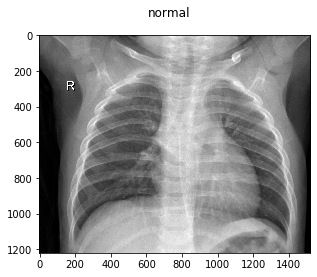

In [11]:
normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

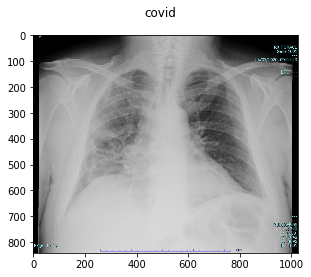

In [12]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [13]:
print(len(normal_images))
print(len(covid_images))

28
70


In [14]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/48
12/12 [==============================] - 3s 258ms/step - loss: 0.8285 - accuracy: 0.6765 - val_loss: 0.7887 - val_accuracy: 0.7083
Epoch 2/48
12/12 [==============================] - 3s 248ms/step - loss: 0.6556 - accuracy: 0.6912 - val_loss: 1.2149 - val_accuracy: 0.7083
Epoch 3/48
12/12 [==============================] - 5s 421ms/step - loss: 0.6713 - accuracy: 0.7647 - val_loss: 0.8126 - val_accuracy: 0.7083
Epoch 4/48
12/12 [==============================] - 5s 402ms/step - loss: 0.6434 - accuracy: 0.6944 - val_loss: 1.1596 - val_accuracy: 0.7083
Epoch 5/48
12/12 [==============================] - 4s 354ms/step - loss: 0.9021 - accuracy: 0.7500 - val_loss: 1.1489 - val_accuracy: 0.7083
Epoch 6/48
12/12 [==============================] - 5s 388ms/step - loss: 0.6440 - accuracy: 0.7083 - val_loss: 1.0706 - val_accuracy: 0.7083
Epoch 7/48
12/12 [==============================] - 5s 379ms/step - 

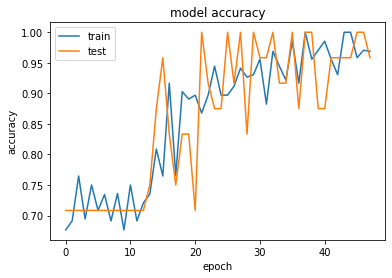

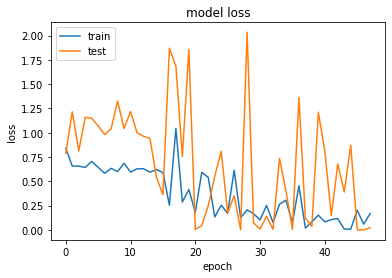

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.96875
validation_accuracy 0.9583333134651184


In [21]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


In [22]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[17,  7],
       [ 0,  0]], dtype=int64)

In [23]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,17,17
1,7,7
All,24,24


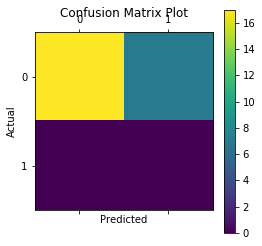

In [24]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [25]:
import pandas as pd 
cases = pd.read_csv("novel-corona-virus-2019-dataset/covid_19_data.csv")
import plotly.offline as py
import plotly.express as px


py.init_notebook_mode(connected=True)

grp = cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
grp = grp.reset_index()
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['Country'] =  grp['Country/Region']

fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths,grp.Active],projection="mercator",
                     animation_frame="Date",width=800, height=500,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],

                     title='World Map of Coronavirus')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

In [26]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


In [27]:
fig = px.pie(symptoms,
            values="percentage",
             names="symptom",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()